Fibonacci numbers
In session 5.2, you analyzed the following version of Fibonacci:
def fib(n):
    if n <= 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)
In the spirit of the rod-cutting examples given in the textbook, write your own memoized version of Fibonacci, and a bottom-up version.

In [34]:
def fib(n):
    if n <= 0:
        return 0
    if n == 1:
        return 1
    return fib(n-1) + fib(n-2)

def dyn_fib(n):
    if n <= 0:
        return 0
    if n == 1:
        return 1
    array = [0 for i in range(n+1)]
    array[1] = 1
    for j in range(2,n+1):
        array[j] = array[j-1]+array[j-2]
    return array[-1]
            
num = 5   
print (dyn_fib(num))
print (fib(num))

5
5


Rod-cutting without dynamic programming
1. Implement CUT-ROD(p, n) in python code (NB - not the dynamic programming version)
2. Time the function for different values of n.
3. Plot the results.
4. Estimate how big n has to be before it will take a million years to finish. (Call this value: N, and use it in the next section)

In [94]:
def CUT_ROD(p,n):
    if n == -1:
        return 0
    q = -1
    for i in range(n):
        q = max(q, p[i] + CUT_ROD(p,n-1))
    return q

p = [1,5,8,9,10,17,17,20,24,30]

CUT_ROD(p,4)

22

In [ ]:
Rod-cutting with dynamic programming
1. Implement PRINT-CUT-ROD-SOLUTION(p, n) in python code
2. Time the function for different values of n.
3. Plot the results on the same plot as the non-dynamic programming solution.
4. Estimate (or time) how long does it take to evaluate PRINT-CUT-ROD-SOLUTION(p, N)? (Where N is the value you got from the previous section)
(Optional) Do you notice anything about the solution for large n?



In [96]:
import math
import numpy as np

def print_cut_rod_solution(p,n):
    (r,s) = extended_bottom_up_cut(p,n)
    while n>0:
        print (s[n])
        n = n - s[n]
        

def extended_bottom_up_cut(p,n):
    r = [0 for i in range(n+1)]
    s = [0 for i in range(n+1)]
    for j in range(1,n+1):
        q = -np.inf
        for i in range(1,j+1):
            if q < p[i] + r[j-1]:
                q = p[i] + r[j-i]
                s[j] = i
        r[j] = q
    return r,s
            
print_cut_rod_solution(p,4)  


4


In [86]:
p = [random.choice([i for i in range(100)]) for i in range(10000)]


print (print_cut_rod_solution(p,60)  )

None


In [88]:
for i in range(10000):
    for j in range(10000):
        i = 1 + 2

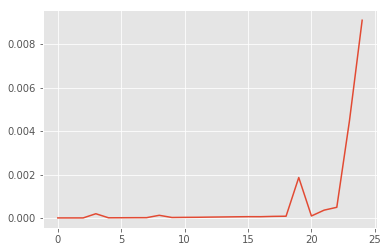

In [83]:
import time
import random

def time_fun(fun,p,n):
    start = time.time()
    fun(p,n)
    return time.time() - start

p = [random.choice([i for i in range(100)]) for i in range(10000)]

time_fun(print_cut_rod_solution, p, 100)


numb = 25

results_1 = [None for i in range(numb)]
results_2 = [None for i in range(numb)]

for i in range(numb):
    results_1[i] = time_fun(print_cut_rod_solution, p,i)
    #results_2[i] = time_fun(CUT_ROD, p,i)
    

plt.style.use('ggplot')
plt.plot(results_1)
plt.show()